In [1]:
import numpy as np
import sys
import os 

In [2]:
res_no_list = [[], []]
directory = "./trial_data/"
for file in os.listdir(directory):
    if(file.endswith('.txt')):
        res_no_list[0].append(file[:4])
        with open(directory + file) as f:
            res_no_list[1].append(len(f.readlines()))
print("Total nubmer of the proteins available in the datasets: {}, total residue nubmers: {}.".format(len(res_no_list[0]), sum(res_no_list[1])))

Total nubmer of the proteins available in the datasets: 59, total residue nubmers: 59243.


In [3]:
len(res_no_list[0])

59

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
# from scipy.interpolate import make_interp_spline, BSpline

# x = np.array([1,2,3,4])
# xnew = np.linspace(1, 4, 300)

# y = np.array(list(data_stat.values()))
# spl = make_interp_spline(x, y, k=2)
# ynew = spl(xnew)

# plt.plot(xnew, ynew)
# plt.show()

In [7]:
paper_dataset = {}

with open('paper_data_info.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip('\n')
        temp = line.split(' ')
        paper_dataset[temp[0]] = temp[1:]

def get_key(x, dic):
    for key, value in dic.items():
        if x in value:
            return key
    raise Exception('Value does not exist')
    return
        
complex_type = []
temp = np.hstack(np.array([v for v in paper_dataset.values()]))
dic_values = [str(i) for i in temp]
for item in res_no_list[0]:
    if item in dic_values:
        complex_type.append(get_key(item, paper_dataset))
    else: complex_type.append('unknown')
len(complex_type)

59

In [8]:
zipped = zip(res_no_list[0], res_no_list[1], complex_type)
zipped = list(zipped)

res = sorted(zipped, key = lambda x: x[1])

In [11]:
res

[('1MNB', 14, 'unknown'),
 ('1G70', 16, 'unknown'),
 ('1I9F', 19, 'unknown'),
 ('1A4T', 19, 'unknown'),
 ('1F6U', 55, 'unknown'),
 ('1D6K', 94, 'unknown'),
 ('2RRA', 99, 'unknown'),
 ('1L1C', 110, 'unknown'),
 ('3Q1R', 112, 'unknown'),
 ('1R9F', 117, 'Viral'),
 ('1K1G', 122, 'unknown'),
 ('2L5D', 134, 'unknown'),
 ('1A34', 147, 'Viral'),
 ('3PDM', 162, 'unknown'),
 ('1DZ5', 202, 'unknown'),
 ('1MMS', 203, 'Ribosomal'),
 ('1MZP', 213, 'Ribosomal'),
 ('1RC7', 220, 'unknown'),
 ('1I6U', 252, 'Ribosomal'),
 ('1AV6', 289, 'Viral'),
 ('1JBS', 298, 'Ribosomal'),
 ('1J1U', 300, 'tRNA'),
 ('1K8W', 304, 'tRNA'),
 ('2A8V', 354, 'mRNA'),
 ('2BU1', 387, 'Viral'),
 ('1B23', 405, 'tRNA'),
 ('1H3E', 427, 'tRNA'),
 ('1T0K', 462, 'Ribosomal'),
 ('1G1X', 466, 'unknown'),
 ('1QTQ', 529, 'tRNA'),
 ('1C0A', 585, 'tRNA'),
 ('3Q2T', 593, 'unknown'),
 ('1F7U', 607, 'tRNA'),
 ('2FMT', 628, 'tRNA'),
 ('1QF6', 641, 'tRNA'),
 ('1M8W', 681, 'unknown'),
 ('1SER', 793, 'tRNA'),
 ('1FFY', 917, 'tRNA'),
 ('1N78', 936, 

In [12]:
data_stat = {}

for i in sorted(res_no_list[1]):
    if i <= 100:
        if '1-100' not in data_stat:
            data_stat['1-100'] = 1
        data_stat['1-100'] += 1
    if i <= 1000 and i > 100:
        if '101-1000' not in data_stat:
            data_stat['101-1000'] = 1
        data_stat['101-1000'] += 1
    if i <= 5000 and i > 1000:
        if '1001-5000' not in data_stat:
            data_stat['1001-5000'] = 1
        data_stat['1001-5000'] += 1
    if i > 5000:
        if '5000+' not in data_stat:
            data_stat['5000+'] = 1
        data_stat['5000+'] += 1

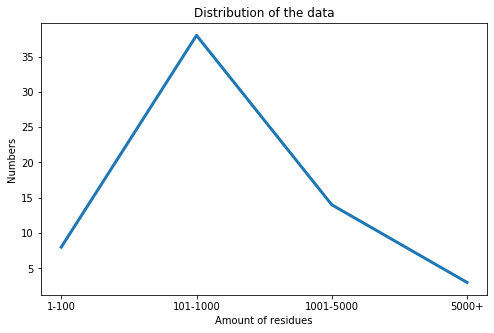

In [13]:
fig = plt.figure(figsize = (8,5))

plt.title("Distribution of the data")
plt.xlabel('Amount of residues')
plt.ylabel('Numbers')

plt.plot(list(data_stat.keys()), list(data_stat.values()), linewidth = 3)
plt.show()